# Hotspot Analysis Results

In [1]:
import hotspot
from itertools import groupby
from json import load
import pandas as pd
import scanpy as sc
import numpy as np
import sys
sys.path.insert(1, '/Users/greencode/Documents/Coding/Analysis-of-scRNA-Sequencing-Data')
import modules.GO.geneOntology as GOAnalysis
import os
import math
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import pickle
import random
import gseapy as gp
pd.set_option('display.max_columns', None)

In [2]:
!pip3 list 

Package                       Version
----------------------------- ---------
alabaster                     0.7.13
anndata                       0.8.0
appnope                       0.1.3
asttokens                     2.2.1
Babel                         2.11.0
backcall                      0.2.0
certifi                       2022.12.7
charset-normalizer            3.0.1
comm                          0.1.2
contourpy                     1.0.7
cycler                        0.11.0
debugpy                       1.6.5
decorator                     5.1.1
docopt                        0.6.2
docutils                      0.19
entrypoints                   0.4
executing                     1.2.0
fonttools                     4.38.0
goatools                      1.2.4
gseapy                        1.0.3
h5py                          3.7.0
hotspotsc                     1.1.1
idna                          3.4
igraph                        0.10.3
imagesize                     1.4.1
ipykernel         

In [3]:
significantGenes = list(pd.read_csv("./significantGenes.csv")["genes"])
significantGenes

['TMEM132D',
 'AC093898.1',
 'AC012645.1',
 'H1F0',
 'UTY',
 'NECTIN3-AS1',
 'LINC02506',
 'AL162493.1',
 'GATD3A',
 'PACRGL',
 'PKNOX1',
 'TNPO3',
 'KIF21A',
 'KMT2A',
 'SRPK2',
 'IFNAR1',
 'LTN1',
 'CRYZL1',
 'BRWD1',
 'GNG4',
 'CCZ1',
 'HSPA13',
 'SON',
 'RRP1B',
 'LSS',
 'MCM3AP-AS1',
 'DONSON',
 'APP',
 'IFNAR2',
 'HPRT1',
 'NDUFV3',
 'GART',
 'MRPL39',
 'SLC35F1',
 'NIM1K',
 'SEC16A',
 'AP000936.1',
 'ZBTB20-AS5',
 'PLAGL1',
 'DCBLD2',
 'NR2F1',
 'AC004158.1',
 'RNF180',
 'WIPF3',
 'CCDC88A',
 'SLC25A12',
 'SP3',
 'OLA1',
 'FAM110B',
 'PBRM1',
 'CACNG4',
 'NPAS3',
 'GLCCI1',
 'NRF1',
 'AP001347.1',
 'ZBTB20',
 'LRCH1',
 'AC008438.1',
 'DYRK1A',
 'TRAPPC10',
 'PAXBP1',
 'MORC3',
 'PDE9A',
 'IPO9',
 'STX6',
 'RABGAP1',
 'FAF1',
 'POGZ',
 'GATAD2B',
 'KLF7',
 'KCNH8',
 'AKT3',
 'TRIM2',
 'NEDD4L',
 'ZNF704',
 'FOXN3',
 'DAPK1',
 'DST',
 'JMJD1C',
 'RC3H1',
 'ENO4',
 'MB21D2',
 'ADGRA1',
 'SERINC5',
 'SNTG1',
 'SHTN1',
 'MGAT5B',
 'L3MBTL4',
 'GPC6',
 'MGAT4C',
 'SRGAP3',
 'PDE8A',
 

In [4]:
HSA21genesDataframe = pd.read_csv("./HSA21_genes_biomaRt_conversion.csv")
HSA21genes = [x for x in HSA21genesDataframe["hgnc_symbol"] if str(x) != 'nan']
HSA21genes

['PRDM15',
 'PFKL',
 'HUNK',
 'COL6A1',
 'IFNAR1',
 'SOD1',
 'COL6A2',
 'SIK1',
 'DNMT3L',
 'TRPM2',
 'TMEM50B',
 'APP',
 'DOP1B',
 'URB1',
 'CXADR',
 'BTG3',
 'C21orf91',
 'CHODL',
 'TMPRSS15',
 'NCAM2',
 'MRPL39',
 'JAM2',
 'ATP5PF',
 'GABPA',
 'ADAMTS1',
 'ADAMTS5',
 'HSPA13',
 'SAMSN1',
 'USP25',
 'N6AMT1',
 'RWDD2B',
 'USP16',
 'CCT8',
 'MAP3K7CL',
 'BACH1',
 'CLDN17',
 'CLDN8',
 'TIAM1',
 'SCAF4',
 'VPS26C',
 'DYRK1A',
 'KCNJ6',
 'KCNJ15',
 'ERG',
 'ETS2',
 'LCA5L',
 'MX1',
 'C2CD2',
 'MIS18A',
 'CFAP298',
 'SYNJ1',
 'PAXBP1',
 'IFNAR2',
 'IFNGR2',
 'GART',
 'SON',
 'DONSON',
 'KCNE2',
 'RCAN1',
 'CLIC6',
 'RUNX1',
 'CBR1',
 'CBR3',
 'MORC3',
 'CHAF1B',
 'CLDN14',
 'SIM2',
 'HLCS',
 'ABCG1',
 'TFF3',
 'TFF2',
 'TFF1',
 'TMPRSS3',
 'UBASH3A',
 'RSPH1',
 'SLC37A1',
 'PDE9A',
 'WDR4',
 'NDUFV3',
 'PKNOX1',
 'CBS',
 'U2AF1',
 'CRYAA',
 'HSF2BP',
 'RRP1B',
 'PDXK',
 'CSTB',
 'RRP1',
 'AGPAT3',
 'TRAPPC10',
 'GATD3A',
 'ICOSLG',
 'AIRE',
 'CFAP410',
 'LRRC3',
 'ITGB2',
 'SLX9',
 'FTCD'

In [5]:
genesInSignificant = 0
significantHSA21genes = []

for gene in significantGenes:
    if gene in HSA21genes:
        genesInSignificant +=1
        significantHSA21genes.append(gene)

print(genesInSignificant)
significantHSA21genes

38


['GATD3A',
 'PKNOX1',
 'IFNAR1',
 'LTN1',
 'CRYZL1',
 'BRWD1',
 'HSPA13',
 'SON',
 'RRP1B',
 'LSS',
 'DONSON',
 'APP',
 'IFNAR2',
 'NDUFV3',
 'GART',
 'MRPL39',
 'DYRK1A',
 'TRAPPC10',
 'PAXBP1',
 'MORC3',
 'PDE9A',
 'MCM3AP',
 'DOP1B',
 'BACH1',
 'HLCS',
 'ITSN1',
 'SYNJ1',
 'POFUT2',
 'RCAN1',
 'CXADR',
 'TTC3',
 'PRMT2',
 'GET1',
 'TIAM1',
 'ATP5PF',
 'CCT8',
 'HMGN1',
 'CHAF1B']

## Hotspot Plot Local Correlations

In [6]:
# Import Pickel Objects
with open('./hotspotObjectSignificantGenes.pkl', 'rb') as inp:
    hs = pickle.load(inp)

In [7]:
print(len(significantGenes))
hs.compute_local_correlations(significantGenes)

546
Computing pair-wise local correlation on 546 features...


100%|██████████| 148785/148785 [09:50<00:00, 251.95it/s]


,TMEM132D,AC093898.1,AC012645.1,H1F0,UTY,NECTIN3-AS1,LINC02506,AL162493.1,GATD3A,PACRGL,PKNOX1,TNPO3,KIF21A,KMT2A,SRPK2,IFNAR1,LTN1,CRYZL1,BRWD1,GNG4,CCZ1,HSPA13,SON,RRP1B,LSS,MCM3AP-AS1,DONSON,APP,IFNAR2,HPRT1,NDUFV3,GART,MRPL39,SLC35F1,NIM1K,SEC16A,AP000936.1,ZBTB20-AS5,PLAGL1,DCBLD2,NR2F1,AC004158.1,RNF180,WIPF3,CCDC88A,SLC25A12,SP3,OLA1,FAM110B,PBRM1,CACNG4,NPAS3,GLCCI1,NRF1,AP001347.1,ZBTB20,LRCH1,AC008438.1,DYRK1A,TRAPPC10,PAXBP1,MORC3,PDE9A,IPO9,STX6,RABGAP1,FAF1,POGZ,GATAD2B,KLF7,KCNH8,AKT3,TRIM2,NEDD4L,ZNF704,FOXN3,DAPK1,DST,JMJD1C,RC3H1,ENO4,MB21D2,ADGRA1,SERINC5,SNTG1,SHTN1,MGAT5B,L3MBTL4,GPC6,MGAT4C,SRGAP3,PDE8A,MFSD4B,PKN2,REV3L,PLEKHA5,PKP4,ADGRB3,DYNC2H1,SORCS2,HECW2,RBMS3,CARMIL1,ALK,RRAS2,MCM3AP,AC027288.3,PLCL1,SHB,CORO2B,DISP3,BCL11A,PID1,SRRM4,CAMK4,TTLL7,MACO1,RNF24,AFAP1,DOP1B,ANK2,VPS45,TOM1L2,BACH1,PITPNC1,HLCS,MARCH1,RALGPS1,SCAI,MYO9A,SCN8A,HECTD4,HERC1,SENP7,ZC4H2,ITSN1,ZNF532,SYNE1,HGSNAT,SYNJ1,DMXL2,INSR,KCNH7,SRGAP1,AC020611.2,IGSF9B,EPHB1,TNIK,NRXN1,AC079142.1,UBASH3B,LHFPL3,SLC24A3,AP001442.1,OLFM3,AC007389.1,B3GAT2,RNF220,SASH1,CCDC148,NAV2,TMEM67,TRAF3,AC109927.1,ZNF16,SUSD4,CAMKV,RASGRF1,CNNM1,ABLIM2,LRRC4C,AL445433.2,POFUT2,RCAN1,GRK5,FCHO1,AC011900.1,TRIM67,KHDRBS3,CDK5R2,RYR3,SORCS3,CSMD1,LRFN5,LINC02223,LHFPL4,SLC1A2,RMST,PLEKHA6,RCAN2,AC019197.1,AC022679.2,RTN1,TTC9B,PHACTR3,CACNG8,SCN3B,MAPT,MLLT11,RTN2,GDAP1L1,KIF21B,CELF3,STMN2,ATP1A3,CHGB,ACTL6B,INA,SCG3,SV2A,THRA,PRKCZ,OCIAD2,SEZ6L2,CELF5,CXADR,MAPK8IP2,TMEM35A,GNB5,GNAO1,TAOK3,CDK5R1,DPF1,AMER2,SNAP25,SCAMP5,KIFAP3,REEP1,RIMKLA,HSPA12A,MICAL1,ELAVL4,ATCAY,ELAVL3,SOX4,MYT1,BSN,NCAN,CORO7,MTMR6,KIAA0408,SOGA3,CD24,MANEAL,SEPTIN3,CRMP1,KLC1,CELSR3,GNG2,KIF3C,SBK1,CCDC112,PDP1,TMEM169,WDR47,CEP170,EXOC5,DPYSL2,HDGFL3,GPR161,DYNC1I2,PPP1R18,ACAP3,ADGRG1,ARHGEF2,SOX11,MAP1A,PRR7,RAB6B,PARP6,TTC3,PRMT2,NDFIP1,GET1,WSB2,NREP,GRIK3,SERTAD4,SEZ6,SH3RF3,FGD3,DYNC1I1,SLC6A1,ESRRG,LHFPL6,GAD1,RPP25,DLX6,SP9,DLX6-AS1,SST,CHST9,LINC00581,DGKI,SCN3A,APBA1,AKAP6,POU2F2,RAB3C,SYT1,ASXL3,PAK5,KSR2,XKR4,CPEB3,SYT16,NMNAT2,RUNX1T1,SRRM3,SVOP,BICDL1,GABRB3,LRRN3,KCNK3,DNM3,CACNG2,BRINP2,KIRREL3,PCDH7,DSCAML1,ENOX1,SYT14,MTSS1,MTMR7,DCLK1,CTNNA2,UNC79,KALRN,ROBO2,ERC2,STXBP5L,AP3B2,FBN3,ASTN1,TIAM1,AC034111.2,LINC00599,SCRT1,UNC5C,CNTN5,AL033504.1,GNG12-AS1,WLS,ERBB4,KCNMB2,KCNMB2-AS1,KCNJ3,AC007405.1,ST18,INSM1,LZTS1-AS1,UBE2QL1,DLL3,LZTS1,ELAVL2,EOMES,CDC20B,ZBTB16,CHST15,RND3,ARL4D,UBE2S,SH3BGRL3,PFN2,HAT1,SH3BGRL,SEPTIN11,EEF1B2,RPL12,RPS2,NPM1,RPLP0,RPS3,RPL7A,RPL17,RPS7,RPL18,RPS8,RPL5,RPL19,RPL13,RPL18A,IFI27L2,SINHCAF,E2F5,LTA4H,IMPDH2,SMIM20,FBL,C19orf81,SNHG16,ISOC2,CXXC5,DYNLT3,PAQR4,SLC27A4,ATP5PF,CCT8,HMGN1,RAB3IP,RARA,SHC2,LNPK,MEX3C,SUGP2,TUBA1C,C20orf27,GTPBP6,OARD1,VKORC1,WDR54,EIF5A,BOD1,RNF7,ANAPC16,SSB,FAM92A,HMGA1,RPL7L1,EIF3L,GTF2H2,ERGIC1,IQCK,AP1AR,NDN,KREMEN1,LMO1,RFTN2,RORB,CRB1,SOX5,TCF4,SYNE2,TNC,AMBN,NPY,LHX2,EMX2,DMRTA2,FEZF2,NEUROG2,FABP7,VIM,TTYH1,CLIC1,HMGN3,ECI1,ITGA2,LRP4,FGFBP3,HES1,ZFP36L1,GAS1,SLC9A3R1,OAF,TTR,AL049637.2,BCL2L12,ID3,FAM89A,LEF1,DMRT3,CCND1,NMU,KIAA1217,PROX1,PAUPAR,DNAJC15,PCDHB5,AC132192.1,ZNF558,ARHGAP25,GCHFR,PTGR1,LY6E,LMO2,SCUBE1,TMEM121,DYRK4,MFSD3,C2orf81,CCDC85C,RHBDL3,NCALD,LGALS3BP,CTSC,GCAT,SCRG1,CHAF1B,FILIP1,TPBG,MROH8,LINC02595,AL627171.2,PLCE1,AL031985.4,AC108134.2,ADAMTS18,WDR49,RHBDF2,AC012409.2,NR2F2-AS1,SFMBT2,RAB11FIP2,AC093298.2,AC124854.1,RBMS1,GPR39,PCDH9,TENM4,ZNF423,ZMAT4,RASGRP1,DLK1,LYPD6B,AC023886.1,WNT7B,ADAMTSL1,MYO1E,LINC01239,ROR1,ABCC4,COL24A1,AL137139.2,EGFR,AK5,ACKR3,EML1,MIR222HG,PLCH1,MID1,ZNRF3,CACHD1,SIPA1L1,MIR99AHG,LIMCH1,ID4,CHCHD2,LHX1,LHX1-DT,LHX5-AS1,LHX5,LINC02609,SLC17A6,PRKG2,AC104009.1
TMEM132D,0.000000,1.438263,0.442275,0.532268,3.019535,5.458721,-5.743797,-8.200392,-7.972635,3.043223,-3.206801,-0.786265,6.996616,-9.920799,-4.913779,-4.200314,-5.230146,-5.703461,-2.740088,-7.818758,-6.806218,-8.716869,-5.456736,-1.298730,-7.811772,-1.144439,-1.249926,-0.483781,-1.726849,-6.911026,-4.578483,-2.287960,-0.589618,-5.889110,-7.868701,1.374334,-0.518842,0.4

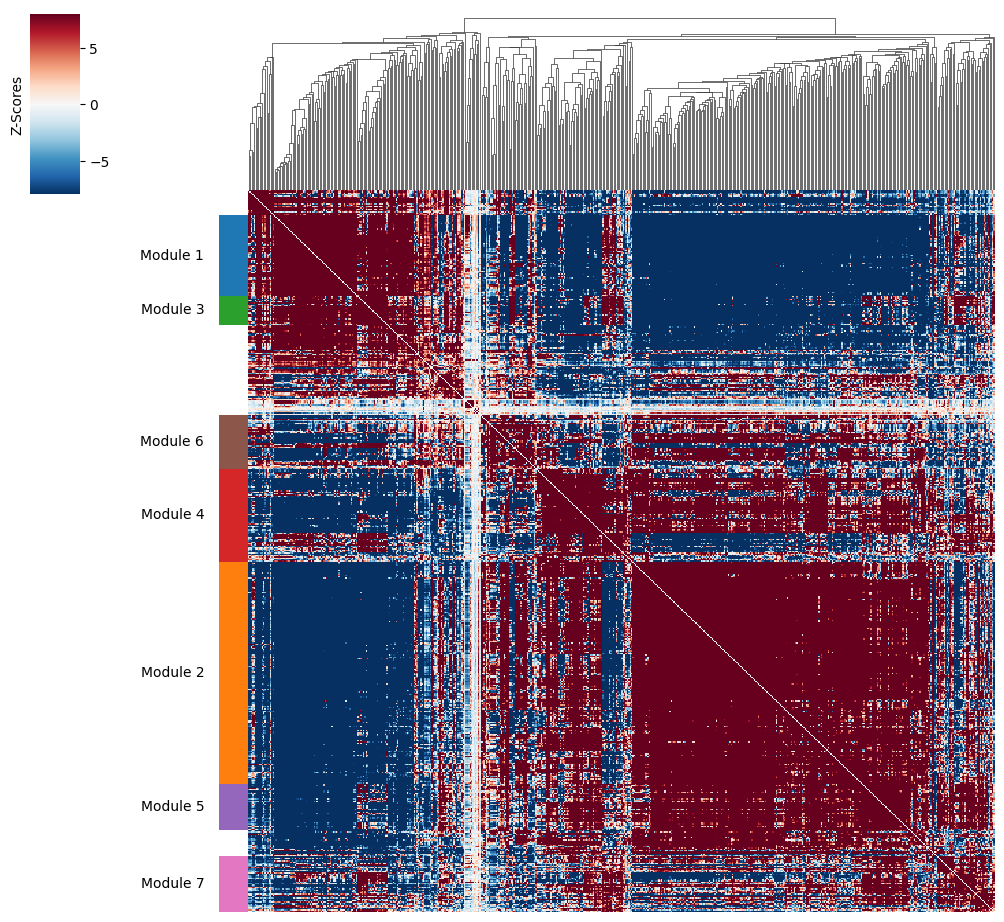

In [8]:
# Creating Modules
modules = hs.create_modules(
    min_gene_threshold=20, core_only=True, fdr_threshold=0.05
)
# Plot Local Correlations
plotLocalCorrelations = hs.plot_local_correlations()
plt.savefig('./output/LocalCorrelationsPlot.png')

In [9]:
hs.local_correlation_z

,TMEM132D,AC093898.1,AC012645.1,H1F0,UTY,NECTIN3-AS1,LINC02506,AL162493.1,GATD3A,PACRGL,PKNOX1,TNPO3,KIF21A,KMT2A,SRPK2,IFNAR1,LTN1,CRYZL1,BRWD1,GNG4,CCZ1,HSPA13,SON,RRP1B,LSS,MCM3AP-AS1,DONSON,APP,IFNAR2,HPRT1,NDUFV3,GART,MRPL39,SLC35F1,NIM1K,SEC16A,AP000936.1,ZBTB20-AS5,PLAGL1,DCBLD2,NR2F1,AC004158.1,RNF180,WIPF3,CCDC88A,SLC25A12,SP3,OLA1,FAM110B,PBRM1,CACNG4,NPAS3,GLCCI1,NRF1,AP001347.1,ZBTB20,LRCH1,AC008438.1,DYRK1A,TRAPPC10,PAXBP1,MORC3,PDE9A,IPO9,STX6,RABGAP1,FAF1,POGZ,GATAD2B,KLF7,KCNH8,AKT3,TRIM2,NEDD4L,ZNF704,FOXN3,DAPK1,DST,JMJD1C,RC3H1,ENO4,MB21D2,ADGRA1,SERINC5,SNTG1,SHTN1,MGAT5B,L3MBTL4,GPC6,MGAT4C,SRGAP3,PDE8A,MFSD4B,PKN2,REV3L,PLEKHA5,PKP4,ADGRB3,DYNC2H1,SORCS2,HECW2,RBMS3,CARMIL1,ALK,RRAS2,MCM3AP,AC027288.3,PLCL1,SHB,CORO2B,DISP3,BCL11A,PID1,SRRM4,CAMK4,TTLL7,MACO1,RNF24,AFAP1,DOP1B,ANK2,VPS45,TOM1L2,BACH1,PITPNC1,HLCS,MARCH1,RALGPS1,SCAI,MYO9A,SCN8A,HECTD4,HERC1,SENP7,ZC4H2,ITSN1,ZNF532,SYNE1,HGSNAT,SYNJ1,DMXL2,INSR,KCNH7,SRGAP1,AC020611.2,IGSF9B,EPHB1,TNIK,NRXN1,AC079142.1,UBASH3B,LHFPL3,SLC24A3,AP001442.1,OLFM3,AC007389.1,B3GAT2,RNF220,SASH1,CCDC148,NAV2,TMEM67,TRAF3,AC109927.1,ZNF16,SUSD4,CAMKV,RASGRF1,CNNM1,ABLIM2,LRRC4C,AL445433.2,POFUT2,RCAN1,GRK5,FCHO1,AC011900.1,TRIM67,KHDRBS3,CDK5R2,RYR3,SORCS3,CSMD1,LRFN5,LINC02223,LHFPL4,SLC1A2,RMST,PLEKHA6,RCAN2,AC019197.1,AC022679.2,RTN1,TTC9B,PHACTR3,CACNG8,SCN3B,MAPT,MLLT11,RTN2,GDAP1L1,KIF21B,CELF3,STMN2,ATP1A3,CHGB,ACTL6B,INA,SCG3,SV2A,THRA,PRKCZ,OCIAD2,SEZ6L2,CELF5,CXADR,MAPK8IP2,TMEM35A,GNB5,GNAO1,TAOK3,CDK5R1,DPF1,AMER2,SNAP25,SCAMP5,KIFAP3,REEP1,RIMKLA,HSPA12A,MICAL1,ELAVL4,ATCAY,ELAVL3,SOX4,MYT1,BSN,NCAN,CORO7,MTMR6,KIAA0408,SOGA3,CD24,MANEAL,SEPTIN3,CRMP1,KLC1,CELSR3,GNG2,KIF3C,SBK1,CCDC112,PDP1,TMEM169,WDR47,CEP170,EXOC5,DPYSL2,HDGFL3,GPR161,DYNC1I2,PPP1R18,ACAP3,ADGRG1,ARHGEF2,SOX11,MAP1A,PRR7,RAB6B,PARP6,TTC3,PRMT2,NDFIP1,GET1,WSB2,NREP,GRIK3,SERTAD4,SEZ6,SH3RF3,FGD3,DYNC1I1,SLC6A1,ESRRG,LHFPL6,GAD1,RPP25,DLX6,SP9,DLX6-AS1,SST,CHST9,LINC00581,DGKI,SCN3A,APBA1,AKAP6,POU2F2,RAB3C,SYT1,ASXL3,PAK5,KSR2,XKR4,CPEB3,SYT16,NMNAT2,RUNX1T1,SRRM3,SVOP,BICDL1,GABRB3,LRRN3,KCNK3,DNM3,CACNG2,BRINP2,KIRREL3,PCDH7,DSCAML1,ENOX1,SYT14,MTSS1,MTMR7,DCLK1,CTNNA2,UNC79,KALRN,ROBO2,ERC2,STXBP5L,AP3B2,FBN3,ASTN1,TIAM1,AC034111.2,LINC00599,SCRT1,UNC5C,CNTN5,AL033504.1,GNG12-AS1,WLS,ERBB4,KCNMB2,KCNMB2-AS1,KCNJ3,AC007405.1,ST18,INSM1,LZTS1-AS1,UBE2QL1,DLL3,LZTS1,ELAVL2,EOMES,CDC20B,ZBTB16,CHST15,RND3,ARL4D,UBE2S,SH3BGRL3,PFN2,HAT1,SH3BGRL,SEPTIN11,EEF1B2,RPL12,RPS2,NPM1,RPLP0,RPS3,RPL7A,RPL17,RPS7,RPL18,RPS8,RPL5,RPL19,RPL13,RPL18A,IFI27L2,SINHCAF,E2F5,LTA4H,IMPDH2,SMIM20,FBL,C19orf81,SNHG16,ISOC2,CXXC5,DYNLT3,PAQR4,SLC27A4,ATP5PF,CCT8,HMGN1,RAB3IP,RARA,SHC2,LNPK,MEX3C,SUGP2,TUBA1C,C20orf27,GTPBP6,OARD1,VKORC1,WDR54,EIF5A,BOD1,RNF7,ANAPC16,SSB,FAM92A,HMGA1,RPL7L1,EIF3L,GTF2H2,ERGIC1,IQCK,AP1AR,NDN,KREMEN1,LMO1,RFTN2,RORB,CRB1,SOX5,TCF4,SYNE2,TNC,AMBN,NPY,LHX2,EMX2,DMRTA2,FEZF2,NEUROG2,FABP7,VIM,TTYH1,CLIC1,HMGN3,ECI1,ITGA2,LRP4,FGFBP3,HES1,ZFP36L1,GAS1,SLC9A3R1,OAF,TTR,AL049637.2,BCL2L12,ID3,FAM89A,LEF1,DMRT3,CCND1,NMU,KIAA1217,PROX1,PAUPAR,DNAJC15,PCDHB5,AC132192.1,ZNF558,ARHGAP25,GCHFR,PTGR1,LY6E,LMO2,SCUBE1,TMEM121,DYRK4,MFSD3,C2orf81,CCDC85C,RHBDL3,NCALD,LGALS3BP,CTSC,GCAT,SCRG1,CHAF1B,FILIP1,TPBG,MROH8,LINC02595,AL627171.2,PLCE1,AL031985.4,AC108134.2,ADAMTS18,WDR49,RHBDF2,AC012409.2,NR2F2-AS1,SFMBT2,RAB11FIP2,AC093298.2,AC124854.1,RBMS1,GPR39,PCDH9,TENM4,ZNF423,ZMAT4,RASGRP1,DLK1,LYPD6B,AC023886.1,WNT7B,ADAMTSL1,MYO1E,LINC01239,ROR1,ABCC4,COL24A1,AL137139.2,EGFR,AK5,ACKR3,EML1,MIR222HG,PLCH1,MID1,ZNRF3,CACHD1,SIPA1L1,MIR99AHG,LIMCH1,ID4,CHCHD2,LHX1,LHX1-DT,LHX5-AS1,LHX5,LINC02609,SLC17A6,PRKG2,AC104009.1
TMEM132D,0.000000,1.438263,0.442275,0.532268,3.019535,5.458721,-5.743797,-8.200392,-7.972635,3.043223,-3.206801,-0.786265,6.996616,-9.920799,-4.913779,-4.200314,-5.230146,-5.703461,-2.740088,-7.818758,-6.806218,-8.716869,-5.456736,-1.298730,-7.811772,-1.144439,-1.249926,-0.483781,-1.726849,-6.911026,-4.578483,-2.287960,-0.589618,-5.889110,-7.868701,1.374334,-0.518842,0.4

## Gene Set Enrichment Analysis on Modules

In [10]:
modules = modules[~modules.index.duplicated(keep="first")]
modules

TMEM132D     -1
AC093898.1    7
AC012645.1    7
H1F0          7
UTY           7
             ..
LHX5          6
LINC02609     6
SLC17A6       6
PRKG2        -1
AC104009.1    6
Name: Module, Length: 546, dtype: int64

In [11]:
modules.max()

7

In [12]:
modulesGeneDict = modules.to_dict()
modulesGeneDict

{'TMEM132D': -1,
 'AC093898.1': 7,
 'AC012645.1': 7,
 'H1F0': 7,
 'UTY': 7,
 'NECTIN3-AS1': 7,
 'LINC02506': -1,
 'AL162493.1': 5,
 'GATD3A': 7,
 'PACRGL': -1,
 'PKNOX1': 5,
 'TNPO3': 4,
 'KIF21A': 7,
 'KMT2A': 5,
 'SRPK2': 5,
 'IFNAR1': 7,
 'LTN1': 7,
 'CRYZL1': 5,
 'BRWD1': 5,
 'GNG4': 2,
 'CCZ1': -1,
 'HSPA13': -1,
 'SON': 7,
 'RRP1B': 7,
 'LSS': 7,
 'MCM3AP-AS1': 5,
 'DONSON': 7,
 'APP': 5,
 'IFNAR2': 7,
 'HPRT1': 7,
 'NDUFV3': 7,
 'GART': 7,
 'MRPL39': 7,
 'SLC35F1': 7,
 'NIM1K': 7,
 'SEC16A': -1,
 'AP000936.1': -1,
 'ZBTB20-AS5': 7,
 'PLAGL1': 1,
 'DCBLD2': 6,
 'NR2F1': 6,
 'AC004158.1': 2,
 'RNF180': 7,
 'WIPF3': 7,
 'CCDC88A': 4,
 'SLC25A12': 4,
 'SP3': 4,
 'OLA1': 4,
 'FAM110B': 4,
 'PBRM1': 4,
 'CACNG4': 2,
 'NPAS3': 3,
 'GLCCI1': 4,
 'NRF1': 4,
 'AP001347.1': 4,
 'ZBTB20': 3,
 'LRCH1': 4,
 'AC008438.1': 7,
 'DYRK1A': 5,
 'TRAPPC10': 7,
 'PAXBP1': 7,
 'MORC3': 5,
 'PDE9A': 5,
 'IPO9': 7,
 'STX6': 5,
 'RABGAP1': 5,
 'FAF1': 7,
 'POGZ': 5,
 'GATAD2B': 5,
 'KLF7': 4,
 'KCNH8': 2

In [13]:
modulesHSA21Dictionary = {}
for i in range(1, modules.max()+1):
    modulesHSA21Dictionary[i] = []
modulesHSA21Dictionary

{1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}

In [14]:
for gene in significantHSA21genes:
    moduleGene = modulesGeneDict[gene]
    if moduleGene != -1:
        modulesHSA21Dictionary[moduleGene].append(gene)
modulesHSA21Dictionary

{1: [],
 2: ['DOP1B', 'BACH1', 'RCAN1', 'CXADR', 'TTC3', 'PRMT2', 'GET1'],
 3: [],
 4: ['TIAM1'],
 5: ['PKNOX1',
  'CRYZL1',
  'BRWD1',
  'APP',
  'DYRK1A',
  'MORC3',
  'PDE9A',
  'MCM3AP',
  'HLCS',
  'ITSN1',
  'SYNJ1'],
 6: [],
 7: ['GATD3A',
  'IFNAR1',
  'LTN1',
  'SON',
  'RRP1B',
  'LSS',
  'DONSON',
  'IFNAR2',
  'NDUFV3',
  'GART',
  'MRPL39',
  'TRAPPC10',
  'PAXBP1',
  'POFUT2',
  'CCT8',
  'CHAF1B']}

In [15]:
hs.results = hs.results.loc[list(modules.index)]
hs.results

,C,Z,Pval,FDR
Gene,,,,
TMEM132D,0.325291,216.733300,0.0,0.0
AC093898.1,0.103638,108.645460,0.0,0.0
AC012645.1,0.221786,184.415466,0.0,0.0
H1F0,0.155137,140.802387,0.0,0.0
UTY,0.372862,341.258233,0.0,0.0
...,...,...,...,...
LHX5,0.366777,412.844829,0.0,0.0
LINC02609,0.420521,431.370826,0.0,0.0
SLC17A6,0.425953,434.911607,0.0,0.0


In [16]:
# Convert Modules into Pandas Dataframe
modulesDataframe = pd.DataFrame(modules)
modulesDataframe["Z"] = hs.results["Z"].tolist()
modulesDataframe = modulesDataframe[modulesDataframe["Module"] != -1]
maximumModule = max(list(modulesDataframe["Module"]))

# Generate Gene Set Enrichment Analysis
for i in range(1, maximumModule+1):
    moduleRank = modulesDataframe[modulesDataframe["Module"] == i]
    moduleRank = moduleRank.rename_axis("Gene").reset_index()
    ranking = moduleRank[['Gene', 'Z']]
    rankingGenes = list(moduleRank["Gene"])

    results = GOAnalysis.geneOntologyAnalysis(rankingGenes)
    results.to_csv("./output/GSEA_Module_"+str(i)+".csv")
    print(results)

    # pre_res = gp.prerank(rnk = ranking, gene_sets = 'GO_Biological_Process_2021', min_size=10, seed = 6, permutation_num = 100)
    # out = []
    # for term in list(pre_res.results):
    #     out.append([term,
    #             pre_res.results[term]['fdr'],
    #             pre_res.results[term]['es'],
    #             pre_res.results[term]['nes']])

    # out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
    # out_df = out_df[out_df["fdr"] < 0.05]
    # out_df.to_csv("./output/GSEA_Module_"+str(i)+".csv")

  EXISTS: gene2go
/Users/greencode/Documents/Coding/Analysis-of-scRNA-Sequencing-Data/modules/GO/go-basic.obo: fmt(1.2) rel(2022-11-03) 46,800 Terms
HMS:0:00:03.555728 339,664 annotations, 20,697 genes, 19,000 GOs, 1 taxids READ: gene2go 

Load BP Ontology Enrichment Analysis ...
 82% 16,797 of 20,605 population items found in association

Load CC Ontology Enrichment Analysis ...
 86% 17,762 of 20,605 population items found in association

Load MF Ontology Enrichment Analysis ...
 85% 17,521 of 20,605 population items found in association
input genes: 61
mapped genes: 57
[5325, 135152, 1933, 6136, 6187, 4869, 6175, 6188, 6130, 6139, 6201, 6141, 6202, 6125, 6143, 6137, 6142, 83982, 58516, 1875, 4048, 3615, 389203, 2091, 8225, 79001, 84058, 1984, 91272, 9616, 6741, 51386, 9355, 2018, 63950, 2173, 7431, 57348, 1192, 9324, 1632, 3673, 143282, 3280, 677, 2619, 220323, 83596, 51176, 595, 3959, 1075, 23464, 4919, 57007, 3400, 51142]

Runing BP Ontology Analysis: current study set of 57 IDs.
 

In [17]:
results

,GO,term,class,p,p_corr,n_genes,n_study,n_go,study_genes
0,GO:0004905,type I interferon receptor activity,molecular_function,0.000003,0.012798,2,35,2,"[IFNAR1, IFNAR2]"


In [18]:
pd.read_csv("./output/GSEA_Module_7.csv")

,Unnamed: 0,GO,term,class,p,p_corr,n_genes,n_study,n_go,study_genes
0,0,GO:0004905,type I interferon receptor activity,molecular_function,0.000003,0.012798,2,35,2,"['IFNAR1', 'IFNAR2']"


In [19]:
# Set List of Prefered GO Terms
selectedTerms = [0,1,0,0,0,0,0]

## Visualizing Module Expression UMAP

In [20]:
# Calculating Module Scores
module_scores = hs.calculate_module_scores()

Computing scores for 7 modules...


100%|██████████| 7/7 [00:40<00:00,  5.82s/it]


In [21]:
module_scores

,1,2,3,4,5,6,7
CON_DS2U_AAACCCACACATATGC-1-0-0-0-0,-2.158103,3.224836,-1.478160,-0.909143,-0.185912,1.460041,-0.384668
CON_DS2U_AAACCCACAGCGGATA-1-0-0-0-0,4.293212,-6.780437,4.132073,-2.087128,-1.689880,-0.829056,-0.283424
CON_DS2U_AAACCCAGTATTCCGA-1-0-0-0-0,-1.785436,3.779545,-1.398934,-0.742252,0.761373,-0.831005,0.441623
CON_DS2U_AAACCCATCCGTGACG-1-0-0-0-0,4.050919,-7.032763,-1.221270,-1.949453,-2.707335,-1.869073,-1.020170
CON_DS2U_AAACGAAAGCGTGAAC-1-0-0-0-0,8.504334,-7.591965,0.299219,-2.761365,-2.498615,-1.842366,-1.387927
...,...,...,...,...,...,...,...
DS_DSP_TTTGGTTTCCTATTTG-1-1,-3.484585,6.677810,-1.770007,4.049854,1.124988,-1.069937,-0.603334
DS_DSP_TTTGGTTTCCTCGCAT-1-1,-3.851153,6.979281,-1.157686,0.942888,1.473776,0.011876,-0.208930
DS_DSP_TTTGGTTTCTGCGATA-1-1,-3.308910,4.016169,-0.436375,-1.242301,0.773148,5.570302,-0.152755
DS_DSP_TTTGTTGAGCCTTTCC-1-1,5.790819,-4.746808,-2.020749,-0.162467,-2.746758,-1.628075,-0.923491


In [23]:
def pp(adataFile):
    inputDataAdata = adataFile
    adata = sc.read(inputDataAdata)
    adata.var_names_make_unique()
    adata.X = adata.X.astype('float64')
    adata.var['mt'] = adata.var_names.str.startswith('MT-')
    riboURL = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
    riboGenes = pd.read_table(riboURL, skiprows=2, header = None)
    adata.var['ribo'] = adata.var_names.isin(riboGenes[0].values)
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', "ribo"], percent_top=None, log1p=False, inplace=True)
    sc.pp.filter_genes(adata, min_counts=3)
    sc.pp.normalize_total(adata, target_sum=10000)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
    adata.raw = adata
    adata = adata[:, adata.var.highly_variable]
    sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
    sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40) # n_neighbors=15 is default
    sc.tl.umap(adata)
    sc.external.pp.bbknn(adata, batch_key='sample')
    # Plotting UMAP after integration
    sc.tl.umap(adata)
    return adata
adata = pp("../output/savedDataClustersFinal.h5ad")

/var/folders/ts/m7c_798d70q3whk59gstkgz00000gn/T/ipykernel_22521/1884668711.py:17: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: Please install bbknn: `pip install bbknn`.

In [ ]:
adata

In [ ]:
modulesDictionary = {}
for i in range(1, maximumModule+1):
    modulesDictionary[i] = 'module'+str(i)
modulesDictionary

In [ ]:
if(list(adata.obs.index) == list(module_scores.index)):
    pdConcat = pd.concat([adata.obs,module_scores], axis=1, ignore_index=False)

pdConcat = pdConcat.rename(columns=modulesDictionary)
pdConcat

In [ ]:
adata.obs = pdConcat

In [ ]:
adata.obs

In [ ]:
sc.pl.umap(adata, color=list(modulesDictionary.values()))

In [ ]:
adataCON = adata[adata.obs["group"] == "CON"]
sc.pl.umap(adataCON, color=list(modulesDictionary.values()))

In [ ]:
adataDS = adata[adata.obs["group"] == "DS"]
sc.pl.umap(adataDS, color=list(modulesDictionary.values()))

In [ ]:
goRenameDictionary = {}
for i in range(1, maximumModule+1):
    fileName = pd.read_csv("./output/GSEA_Module_"+str(i)+".csv")
    if(len(fileName.index)!=0):
        goTerm = fileName["term"][selectedTerms[i-1]]
    else:
        goTerm = "NO SIGNIFICANT GO TERM"+str(i)
    goRenameDictionary['module'+str(i)] = goTerm
goRenameDictionary

In [ ]:
renamedAdata = adata
renamedAdata.obs = renamedAdata.obs.rename(columns=goRenameDictionary)
renamedAdata.obs

In [ ]:
list(goRenameDictionary.values())

In [ ]:
sc.pl.umap(renamedAdata, color=list(goRenameDictionary.values()))